In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('./drive/My Drive/ERA5_Dataset')

Mounted at /content/drive


In [4]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import GradientBoostingClassifier
from datetime import datetime

import pickle
import metrics
import datashift

# Evaluate variables distribution on Z11





## KDE for Wind Gust

In [8]:
def mean_n_zones(zones_n):
  new_att_list = []
  for i in range(zones_n):
    new_att_list.append('Mean_Z{}-0'.format(i+1))
  return new_att_list

In [9]:
df_wind = pd.read_csv('./csv/16_zones/wind_gust_10D.csv')
atts = ['DATE'] + mean_n_zones(16)
df_wind = df_wind[atts]
df_wind

,DATE,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,Mean_Z10-0,Mean_Z11-0,Mean_Z12-0,Mean_Z13-0,Mean_Z14-0,Mean_Z15-0,Mean_Z16-0
0,1980-01-12,5.381555,9.447551,7.961275,8.514588,5.209139,9.588754,8.850654,7.066307,7.443629,7.448700,7.617693,9.689114,8.407108,11.876979,13.182545,11.520491
1,1980-01-13,5.792269,8.198696,5.636487,7.839208,4.452687,10.131536,7.299232,7.484996,5.693313,6.635979,7.893997,11.094159,6.894467,10.570286,12.959018,10.963511
2,1980-01-14,5.127522,6.858602,6.426326,8.731751,4.203879,9.410537,7.404046,7.026360,5.649755,6.239395,9.714540,11.997676,7.366055,7.963233,12.529026,10.867162
3,1980-01-15,5.498013,7.926597,7.692457,9.441629,4.977519,8.847863,6.904106,6.023536,7.974710,6.600487,10.189182,11.671708,8.374872,8.049296,10.785515,9.882605
4,1980-01-16,5.236773,6.309575,6.783029,8.846063,4.891237,9.515797,6.958692,6.946209,6.746197,7.061572,8.670515,10.487875,10.438202,12.249752,10.106409,8.857058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,2022-03-23,5.072216,5.048309,7.381640,8.071348,4.449345,7.762067,7.338914,10.925027,5.241772,7.124804,10.965459,14.312355,8.614813,8.715650,8.135213,11.752892
15412,2022-03-24,5.248760,6.139183,10.720927,7.240363,4.121002,6.730859,8.647804,9.509389,3.520406,7.205750,10.681937,13.185038,6.638721,9.263336,8.099617,9.692260
15413,2022-03-25,4.138962,5.889070,11.888296,6.964813,3.311742,5.884970,9.942068,9.837467,3.502117,5.689877,11.939477,12.121048,6.474759,8.066953,10.361195,10.604379
15414,2022-03-26,4.439019,5.000400,9.889843,5.914646,3.403260,5.553199,9.697565,9.070245,4.441054,5.618417,12.497691,12.738067,6.225199,6.232589,9.879186,12.419699


In [10]:
wind_zones = []
zones_flag = []
N_samples = len(df_wind)

for att in mean_n_zones(16):
  wind_zones.append(df_wind[att].values)

for i in range(16):
  zones_flag.append(np.full(N_samples, i+1))

wind_arr = np.concatenate(wind_zones)
flag_arr = np.concatenate(zones_flag)
# Create a DataFrame using the arrays
data = {'Wind': wind_arr, 'Zone': flag_arr}
df_kde = pd.DataFrame(data)

df_kde

,Wind,Zone
0,5.381555,1
1,5.792269,1
2,5.127522,1
3,5.498013,1
4,5.236773,1
...,...,...
246651,11.752892,16
246652,9.692260,16
246653,10.604379,16
246654,12.419699,16


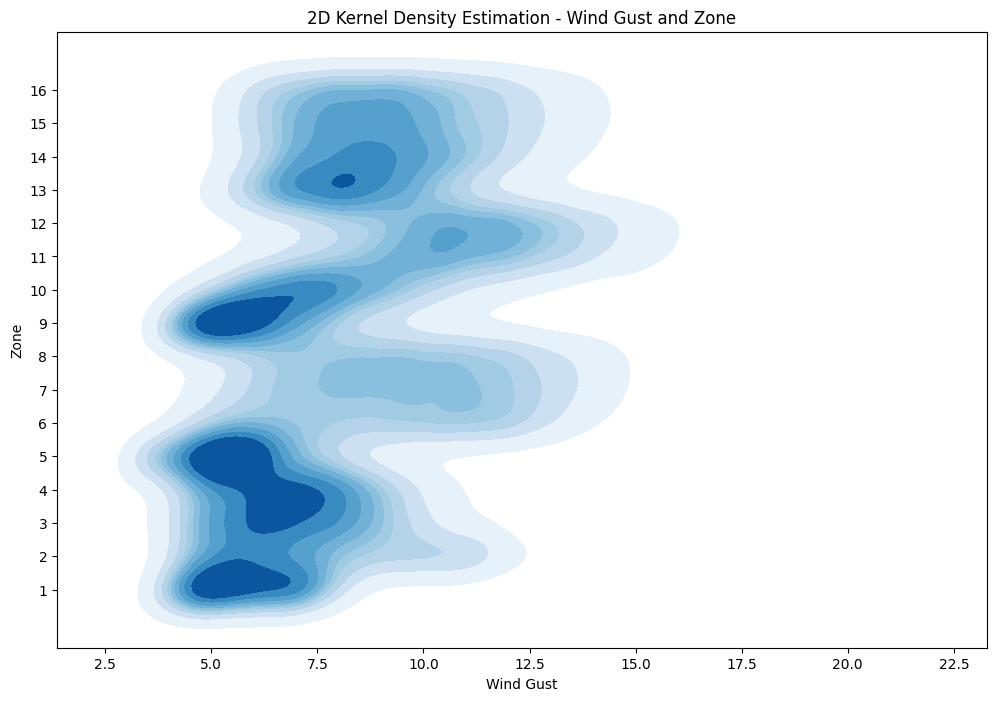

In [11]:
# Create a 2D KDE plot
plt.figure(figsize=(12, 8))
sns.kdeplot(x='Wind', y='Zone', data=df_kde, cmap="Blues", fill=True)

# Set custom y-axis tick values
custom_y_ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
plt.yticks(custom_y_ticks)

plt.title('2D Kernel Density Estimation - Wind Gust and Zone')
plt.xlabel('Wind Gust')
plt.ylabel('Zone')

plt.show()

In [15]:
zone = 11
df_z11 = df_kde[df_kde['Zone'] == 11]

df_z11

,Wind,Zone
154160,7.617693,11
154161,7.893997,11
154162,9.714540,11
154163,10.189182,11
154164,8.670515,11
...,...,...
169571,10.965459,11
169572,10.681937,11
169573,11.939477,11
169574,12.497691,11


In [16]:
from sklearn.neighbors import KernelDensity


dataset = df_z11['Wind'].values
# KernelDensity requires 2D array
dataset = dataset[:, np.newaxis]
# fit KDE to the dataset
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(dataset)
# x-value range for plotting KDE
x_range = np.linspace(dataset.min()-0.3, dataset.max()+0.3, num=600)
# compute the log-likelihood of each sample
log_density = kde.score_samples(x_range[:, np.newaxis])

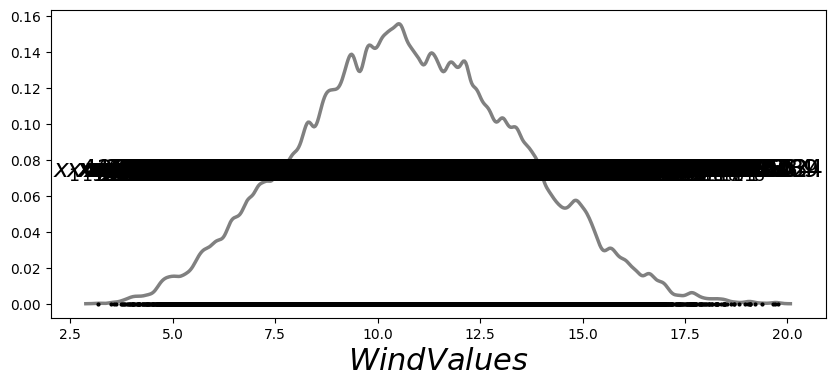

In [18]:
plt.figure(figsize=(10,4))
# put labels over datapoints
for i, xi in enumerate(dataset):
    plt.annotate(r'$x_{}$'.format(i+1),
                 xy=[xi, 0.07],
                 horizontalalignment='center',
                 fontsize=18)

# draw KDE curve
plt.plot(x_range, np.exp(log_density),
         color='gray', linewidth=2.5)

# draw boxes representing datapoints
plt.plot(dataset, np.zeros_like(dataset) , 'o', markersize=2, color='black')

plt.xlabel('$Wind Values$', fontsize=22)
plt.ylabel('', fontsize=22, rotation='horizontal', labelpad=24)
plt.show()

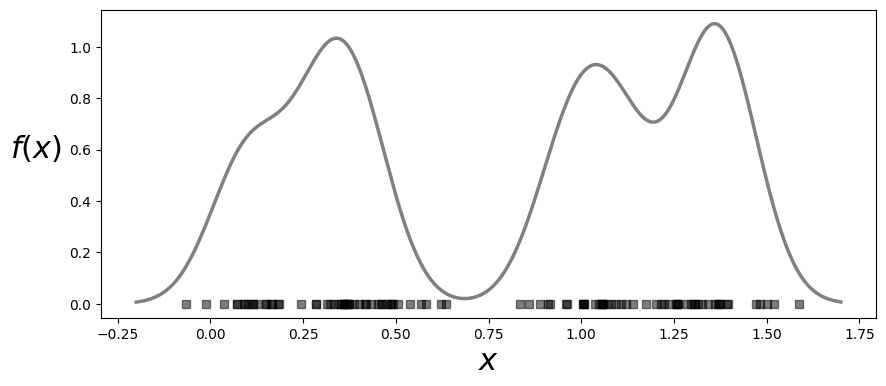

In [13]:
# Generate random samples from the model
synthetic_data = kde.sample(100)

plt.figure(figsize=(10,4))

# draw KDE curve
plt.plot(x_range, np.exp(log_density),
         color='gray', linewidth=2.5)

# draw boxes representing datapoints
plt.plot(synthetic_data, np.zeros_like(synthetic_data) , 's',
         markersize=6, color='black', alpha=0.5)

plt.xlabel('$x$', fontsize=22)
plt.ylabel('$f(x)$', fontsize=22, rotation='horizontal', labelpad=24)
plt.show()